In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
#import contextily as ctx

In [ ]:

base_total = pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv")   
base_total


,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA
3,1,1001,1001000001,0100100001X,100000000000,133,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4,1,1001,1001000001,0100100001X,100000000000,135,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO
...,...,...,...,...,...,...,...,...,...,...
616673,1,1015,1015000167,0101507413X,901015000000,87,7,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616674,1,1015,1015000167,0101507413X,901015000000,VB,25,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,BLANCO
616675,1,1015,1015000167,0101507413X,901015000000,VII,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,IMPUGNADO
616676,1,1015,1015000167,0101507413X,901015000000,VN,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,NULO


In [ ]:
base_limpia = base_total[['VOTOS_AGRUPACION','NOMBRE_CATEGORIA','NOMBRE_REGION','NOMBRE_AGRUPACION']]

In [ ]:
#Filtramos las variables de Presidente y Vicepresidente
presi_vice = base_limpia[base_limpia["NOMBRE_CATEGORIA"]== 'Presidente y Vicepresidente de la República']
print(presi_vice)

        VOTOS_AGRUPACION  ...                               NOMBRE_AGRUPACION
0                      1  ...                        MOVIMIENTO AL SOCIALISMO
1                      5  ...                                      FRENTE NOS
2                      2  ...                                 FRENTE PATRIOTA
3                     15  ...  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4                     85  ...                            JUNTOS POR EL CAMBIO
...                  ...  ...                                             ...
103721                10  ...             UNITE POR LA LIBERTAD Y LA DIGNIDAD
103722                13  ...                                          BLANCO
103723                 0  ...                                       IMPUGNADO
103724                 0  ...                                            NULO
103725                 0  ...                                       RECURRIDO

[103726 rows x 4 columns]


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
total_agrupados=presi_vice.groupby("NOMBRE_AGRUPACION")["VOTOS_AGRUPACION"].sum()
total_agrupados


NOMBRE_AGRUPACION
BLANCO                                             62397
CONSENSO FEDERAL                                  168607
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD     75746
FRENTE DE TODOS                                   637891
FRENTE NOS                                         22592
FRENTE PATRIOTA                                     5172
IMPUGNADO                                            383
JUNTOS POR EL CAMBIO                              863169
MOVIMIENTO AL SOCIALISMO                           21470
MOVIMIENTO DE ACCION VECINAL                        2406
NULO                                               19116
PARTIDO AUTONOMISTA                                 2126
RECURRIDO                                            644
UNITE POR LA LIBERTAD Y LA DIGNIDAD                68828
Name: VOTOS_AGRUPACION, dtype: int64

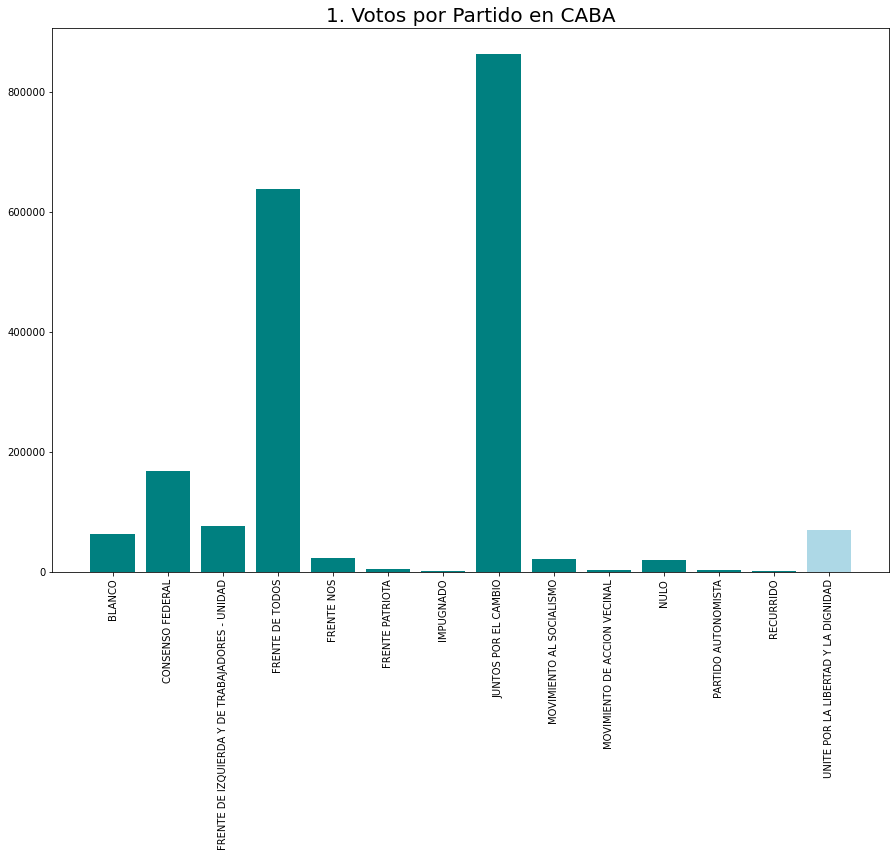

In [ ]:
plt.figure(figsize=(15,10))
color = ["#ADD8E6"if partido=="UNITE POR LA LIBERTAD Y LA DIGNIDAD" else "#008080" for partido in total_agrupados.index]
plt.bar(x=total_agrupados.index,height=total_agrupados,color=color)        
plt.xticks(rotation=90)
plt.title("1. Votos por Partido en CABA",fontsize=20)
plt.show()

In [ ]:
partido_unite=presi_vice.loc[presi_vice["NOMBRE_AGRUPACION"]=="UNITE POR LA LIBERTAD Y LA DIGNIDAD"]
votos_comuna= partido_unite.groupby("NOMBRE_REGION")["VOTOS_AGRUPACION"].sum()

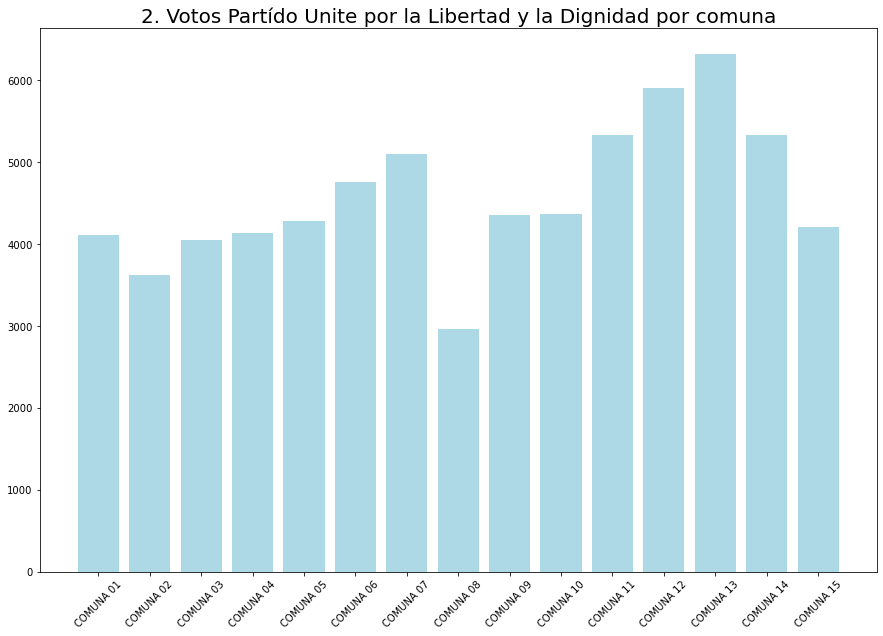

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(x=votos_comuna.index,height=votos_comuna,color=["#ADD8E6"])        
plt.xticks(rotation=45)
plt.title("2. Votos Partído Unite por la Libertad y la Dignidad por comuna",fontsize=20)
plt.show()

In [ ]:
analisis_final= pd.pivot_table(presi_vice,values="VOTOS_AGRUPACION",index="NOMBRE_REGION",columns="NOMBRE_AGRUPACION",aggfunc="sum")

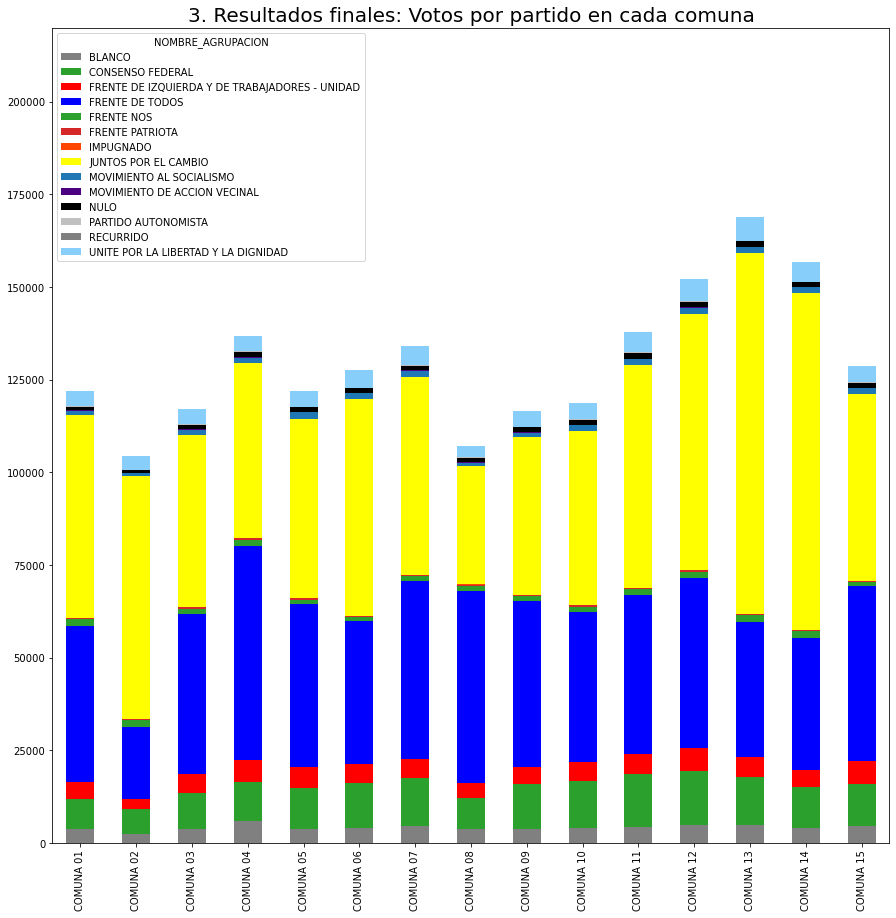

In [ ]:
colors = ["gray","C12","red","b","C2","C3","orangered","yellow","C10","indigo","k","silver","C7","lightskyblue"]
analisis_final.plot(kind="bar",stacked=True,figsize=(15,15),ylim=(0,220000),xlabel="",color=colors)
plt.title("3. Resultados finales: Votos por partido en cada comuna",fontsize=20)
plt.show()  

# ANALISIS # 

El *gráfico N1* expone los resultados generales de las elecciones Primarias Abiertas Simultaneas Obligatorias del 2019
para el cargo Ejecutivo Nacional. El partido Unite por la Libertad y la Dignidad se posicionó como la quinta fuerza más votada 
en la Ciudad Autónoma de Buenos Aires. Si profundizamos en los resultados, como muestra el *gráfico N2*, el partido representado por 
Jose Luis Espert concentró la mayoría de sus votos en la Comuna 13, que está conformada por los barrios del Noreste de la Ciudad, tales como Nuñez, Colegiales y 
Belgrano. Contrariamente, bien podría considerarse que en la Comuna 8 (ubicada en la zona Suroeste, entre los barrios Villa 
Lugano, Villa Soldati y Villa Riachuelo) era evidente que la agrupación no iba a hacer una gran elección. De hecho, así como lo 
expresa el *gráfico N2*, fue en la comuna que logró menos votos. Y si continuamos con los puntos débiles del partido, en la 
comuna 4 (Nueva Pompeya, Parque Patricios, Barracas y la Boca) y en la 5 (Almagro y Boedo) se repiten los resultados electorales bajos.

Sin embargo, llama la atención que el segundo distrito donde menos votos recibió la nueva fuerza fue en la comuna 2, delimitada por el barrio de
Recoleta. Esto puede verse en el *gráfico N3*, allí donde Juntos por el Cambio hizo su mejor performance.

Siguiendo éste analisis creemos que la mejor estrategia a llevar adelante por Unite es la siguiente: por un lado, desistir de sus esfuerzos en la campaña electoral allí donde menos
desempeño positivo obtuvo, es decir, en el cordón sur de CABA. Inversamente, se recomienda destinar dichos recursos materiales y humanos en aquellos sectores de la capital
donde más votos cosechó. Esto, con el objetivo de obtener mas votos de cara a los proximos comicios, pues donde en las PASO le fue bien podría incluso aumentar su caudal. Como ya mencionamos, la comuna 13, más las secciones comprendidas en la comuna 14 (Palermo) y la 12 (Coghlan, Villa Urquiza, Villa Pueyredon y Saavedra), donde tambien tuvo un desempeño considerable.

Cabe destacar tambien, como exhibe el *grafico N3* que la tasa de victoria de JxC coincide con el buen desempeño de Unite; esto significa que en las comunas donde JxC ganó, hay una alza en los votos del segundo. Y al posicionarse ambos partidos dentro del mismo espectro ideológico, Espert podría erosionar parte del voto cambiemista a su favor. Y teniendo en cuenta el partido representado por Macri ganó en la comuna 2, se sugiere hacer más hincapie en la campaña electoral y amentar las presencia en esa zona, puesto que es una región con alto potencial de votos en favor de Espert.


  ## __PARTE 2__

In [14]:
import pandas as pd
import geopandas as gpd

### vuelvo a leer la base

In [29]:
base_total = pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv")
presi_vice = base_total[base_total['NOMBRE_CATEGORIA']=='Presidente y Vicepresidente de la República']
presi_vice = presi_vice.groupby(['NOMBRE_REGION','NOMBRE_AGRUPACION'])['VOTOS_AGRUPACION'].sum().reset_index()  
presi_vice.head()

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,COMUNA 01,BLANCO,3674
1,COMUNA 01,CONSENSO FEDERAL,8305
2,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4368
3,COMUNA 01,FRENTE DE TODOS,42299
4,COMUNA 01,FRENTE NOS,1763


In [42]:
resultado_partido = (presi_vice[presi_vice['NOMBRE_AGRUPACION']=='UNITE POR LA LIBERTAD Y LA DIGNIDAD'].groupby('NOMBRE_REGION')['VOTOS_AGRUPACION'].sum() / presi_vice.groupby('NOMBRE_REGION')['VOTOS_AGRUPACION'].sum())*100
resultado_partido = pd.DataFrame(resultado_partido).reset_index().rename({'VOTOS_AGRUPACION': 'RESULTADO_PARTIDO'}, axis=1)
resultado_partido

,NOMBRE_REGION,RESULTADO_PARTIDO
0,COMUNA 01,3.364636
1,COMUNA 02,3.477669
2,COMUNA 03,3.457753
3,COMUNA 04,3.019744
4,COMUNA 05,3.506456
5,COMUNA 06,3.729799
6,COMUNA 07,3.801791
7,COMUNA 08,2.766990
8,COMUNA 09,3.733967
9,COMUNA 10,3.678000


### leo datos de los censos

Importo los csv de los censos

In [16]:
# leo los datos de persona que tienen la info de si termino el primario
persona = pd.read_csv ("censo/persona.csv")    #CAMBIAR LINK
persona.head(2)

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/hogar.csv"
#NURI "C:/Users/Nuri/Desktop/metop/MET4OP/dataset/censo2010/hogar.csv"

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1


In [17]:
# leo hogar para ver en que hogar esta cada persona
hogar = pd.read_csv ("censo/hogar.csv")    #CAMBIAR LINK
hogar.head(2)

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/hogar.csv"
#NURI "C:/Users/Nuri/Desktop/metop/MET4OP/dataset/censo2010/hogar.csv"

,HOGAR_REF_ID,VIVIENDA_REF_ID,NHOG,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI
0,1,1,1,1,4,1,1,1,1,1,1,1,1,2,2,1,2,1,2,5,1,1,0
1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,0


In [18]:
# leo vivienda para ver en que vivienda esta cada hogar
vivienda = pd.read_csv ("censo/vivienda.csv") #CAMBIAR LINK
vivienda.head(2)

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/vivienda.csv
#NURI "C:/Users/Nuri/Desktop/metop/MET4OP/dataset/censo2010/vivienda.csv"

,VIVIENDA_REF_ID,RADIO_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,LOCAL,INCALCONS,TOTHOG
0,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2
1,2,1,1,7,1,0,1,1,2,20010001,2001010,2,2


In [19]:
# leo radio para ver en que radio esta cada vivienda
radio = pd.read_csv ("censo/radio.csv")  #CAMBIAR LINK
radio.head(2)

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/radio.csv"
#NURI "C:/Users/Nuri/Desktop/metop/MET4OP/dataset/censo2010/radio.csv"

,RADIO_REF_ID,FRAC_REF_ID,IDRADIO
0,1,1,1
1,2,2,1


In [20]:
# leo fraccion para ver en que fraccion esta cada radio
fraccion = pd.read_csv ("censo/frac.csv")   #CAMBIAR LINK
fraccion.head(2) 

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/frac.csv"
#NURI "C:/Users/Nuri/Desktop/metop/MET4OP/dataset/censo2010/frac.csv"

,FRAC_REF_ID,DPTO_REF_ID,IDFRAC
0,1,1,1
1,2,1,2


In [21]:
# leo dpto para ver en que depto esta cada fraccion
dpto = pd.read_csv("censo/dpto.csv")   #CAMBIAR LINKS
dpto.head(2)

#CATA: ("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/dpto.csv")
#NURI: "C:/Users/Nuri/Desktop/metop/MET4OP/dataset/censo2010/dpto.csv"

,DPTO_REF_ID,PROV_REF_ID,IDDPTO,DPTO,NOMDPTO
0,1,1,1,2001,Comuna 01 ...
1,2,1,2,2002,Comuna 02 ...


Hago el merge de todos los archivos de censo

In [22]:
persona = persona.merge(hogar, on='HOGAR_REF_ID', how='left')
persona = persona.merge(vivienda, on='VIVIENDA_REF_ID', how='left')
persona = persona.merge(radio, on='RADIO_REF_ID', how='left')
persona = persona.merge(fraccion, on='FRAC_REF_ID', how='left')
persona = persona.merge(dpto, on='DPTO_REF_ID', how='left')

In [23]:
# me fijo que personas tienen primario incompleto (inicial completo | primario incompleto)
persona['primario_incompleto'] = ((persona['P09']==1) | ((persona['P09']==2) & (persona['P08']!=2))).astype(int)

In [24]:
primario_inc = persona.groupby('NOMDPTO')['primario_incompleto'].mean().copy()*100
primario_inc = pd.DataFrame(primario_inc).reset_index()
primario_inc['NOMBRE_REGION'] = primario_inc['NOMDPTO'].apply(lambda f: f.strip().upper())
primario_inc.drop('NOMDPTO', axis=1, inplace=True)
del persona

In [37]:
primario_inc.head()

,primario_incompleto,NOMBRE_REGION
0,10.257618,COMUNA 01
1,7.371527,COMUNA 02
2,10.262508,COMUNA 03
3,14.811794,COMUNA 04
4,10.072903,COMUNA 05


### importo los RADIOS CENSALES

In [34]:
radios_censales = gpd.read_file("cabaxrdatos.shp")
       #acordarse de cambiar el path cuando importan 
       #VIKI: "/Users/cataa/Desktop/MET4OP/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp")
       #CATA: "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp"
       #NURI: "C:/Users/Nuri/Desktop/metop/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp"


In [35]:
# agrupo los datos geograficos por depto
radios_censales = radios_censales.dissolve('DEPTO').reset_index()
radios_censales['NOMBRE_REGION'] = radios_censales['DEPTO'].apply(lambda f: 'COMUNA ' + f[-2:])
radios_censales = radios_censales[['NOMBRE_REGION','geometry']]
radios_censales.head(3)

,NOMBRE_REGION,geometry
0,COMUNA 01,"POLYGON ((4199575.315 6141887.335, 4199578.077..."
1,COMUNA 02,"POLYGON ((4197459.997 6145624.504, 4197381.218..."
2,COMUNA 03,"POLYGON ((4196703.176 6142112.224, 4196628.688..."


### junto geografia, censo y votos en uno solo

In [44]:
data_final = radios_censales.merge(primario_inc, on='NOMBRE_REGION')
data_final = data_final.merge(resultado_partido, on='NOMBRE_REGION')
data_final

,NOMBRE_REGION,geometry,primario_incompleto,RESULTADO_PARTIDO
0,COMUNA 01,"POLYGON ((4199575.315 6141887.335, 4199578.077...",10.257618,3.364636
1,COMUNA 02,"POLYGON ((4197459.997 6145624.504, 4197381.218...",7.371527,3.477669
2,COMUNA 03,"POLYGON ((4196703.176 6142112.224, 4196628.688...",10.262508,3.457753
3,COMUNA 04,"MULTIPOLYGON (((4197371.959 6138585.100, 41973...",14.811794,3.019744
4,COMUNA 05,"POLYGON ((4195847.563 6141124.209, 4195834.392...",10.072903,3.506456
5,COMUNA 06,"POLYGON ((4194086.502 6142445.725, 4193999.327...",9.711147,3.729799
6,COMUNA 07,"POLYGON ((4194107.882 6139573.100, 4194002.210...",12.812399,3.801791
7,COMUNA 08,"POLYGON ((4190175.934 6135298.881, 4189974.219...",17.238046,2.766990
8,COMUNA 09,"POLYGON ((4188472.591 6138226.329, 4188357.180...",12.965012,3.733967
9,COMUNA 10,"POLYGON ((4188757.307 6141053.203, 4188736.038...",11.682789,3.678000


### Ahora hago los graficos

In [50]:
import matplotlib.pyplot as plt

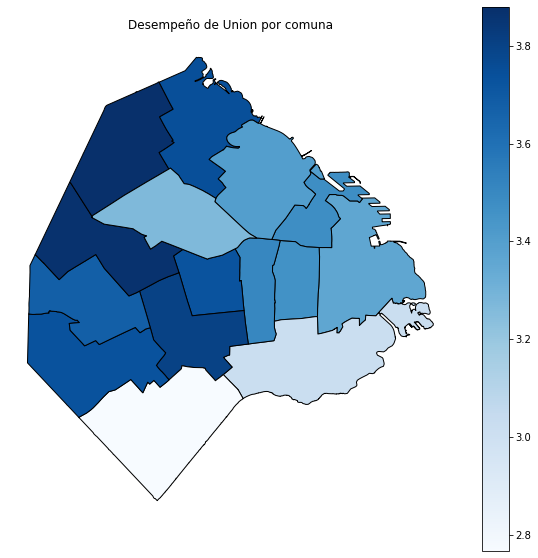

In [51]:
mapa_comunas=data_final.plot(column="RESULTADO_PARTIDO",cmap='Blues', figsize=(10, 10), edgecolor='black', legend=True)
mapa_comunas.axis("off")
mapa_comunas.set_title("Desempeño de UNITE por comuna")
plt.show()

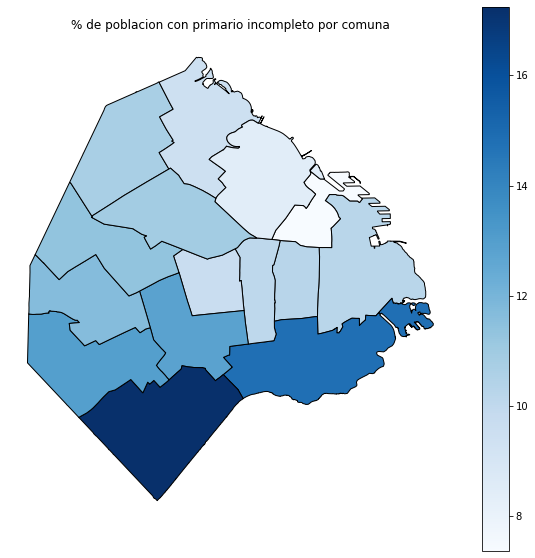

In [52]:
mapa_comunas=data_final.plot(column="primario_incompleto",cmap='Blues', figsize=(10, 10), edgecolor='black', legend=True)
mapa_comunas.axis("off")
mapa_comunas.set_title("% de poblacion con primario incompleto por comuna")
plt.show()

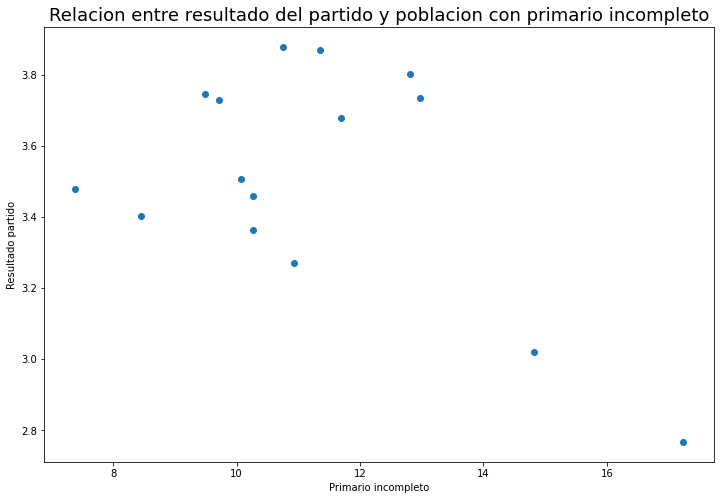

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(x=data_final['primario_incompleto'], y=data_final['RESULTADO_PARTIDO'])
plt.title('Relacion entre resultado del partido y poblacion con primario incompleto', fontsize=18)
plt.xlabel('Primario incompleto')
plt.ylabel('Resultado partido')
plt.show()

## Análisis ##
Podemos observar según los graficos arriba desplegados, que aquellas comunas donde sus habitantes no han finalizado el primario (ya sea porque lo comenzaron y luego lo abandonaron o porque su maximo nivel alcanzado fue el nivel inicial), se condicen con aquellos circuitos electorales donde peor le ha ido a nuestro partido en los comicios del 2019. Como hemos descrito en la primera parte del trabajo, las comunas de la zona sur de la ciudad como la 8 (Villa Lugano, Soldati y Riachuelo) y la comuna 4 (Nueva Pompeya, Barracas, Parque Patricios y La Boca) fueron las que menos votos obtuvieron por parte de Unite por la Libertad y la Dignidad. Y a su vez son las 2 comunas donde hay mayor densidad de habitantes con primario incompleto. 

Por el contrario, en los circuitos donde los niveles educativos son mas altos sí se correlacionan de manera directa con las comunas donde nuestro partido hizo una buena elección. Es decir, las comunas 12 (Villa Urquiza, Coghlan, Saavedra), 13 (Belgrano, Nuñez, Colegiales) y 14 (Palermo). Sería interesante para el futuro sumar la variable del nivel socioeconómico, con el objetivo de afinar más el análisis respecto al votante medio libertario. 

En conclusion, y como demuestra nuestro ultimo grafico, no existe correlacion directa entre el desempeño del partido Unite con aquellas zonas donde sus habitantes están menos escolarizados/as.

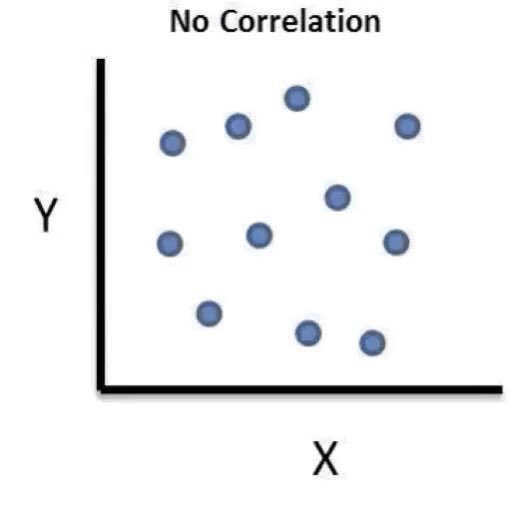

In [2]:
from IPython.display import Image
Image ("no_correlation.jpg")

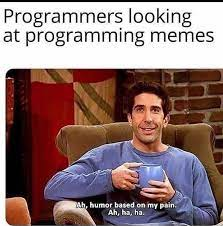

In [4]:
from IPython.display import Image
Image ("ross.jpeg")